In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
# Load the csv file 
file_path = 'Retail_sales.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


CLEANING THE DATA

In [7]:
#Convert the 'Date' column into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Checking for missing values
df.isnull().sum()

Store ID                 0
Product ID               0
Date                     0
Units Sold               0
Sales Revenue (USD)      0
Discount Percentage      0
Marketing Spend (USD)    0
Store Location           0
Product Category         0
Day of the Week          0
Holiday Effect           0
dtype: int64

ANALYZING KEY METRICS

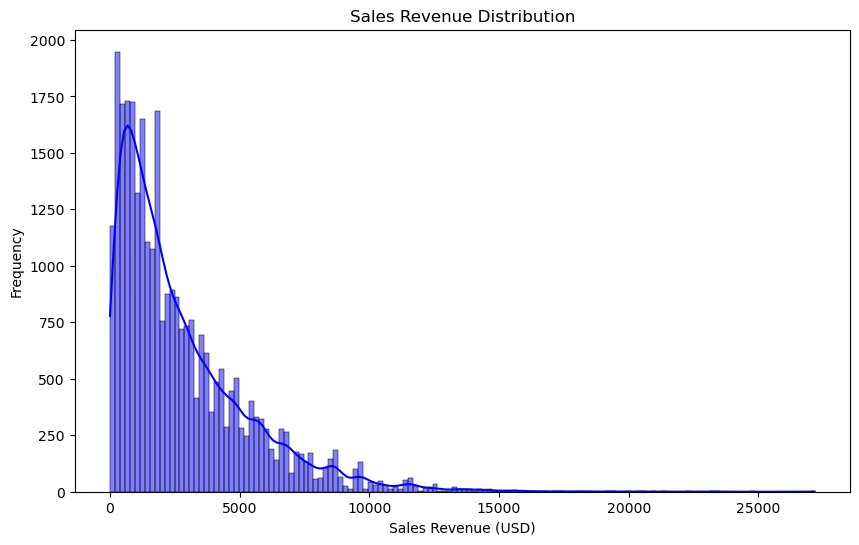

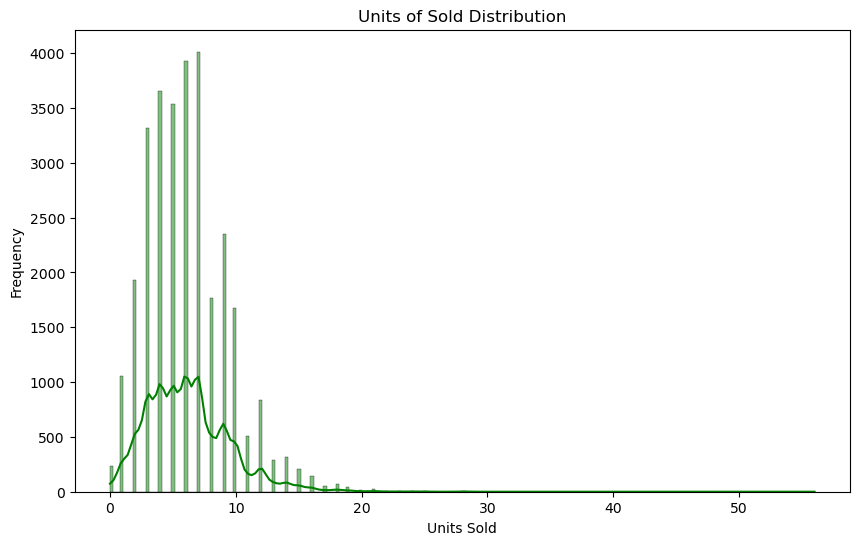

In [9]:
# Plot distribution of sales revenue
plt.figure(figsize=(10,6))
sns.histplot(df['Sales Revenue (USD)'], kde=True, color='blue')
plt.title('Sales Revenue Distribution')
plt.xlabel('Sales Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

#Plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(df['Units Sold'], kde=True, color='green')
plt.title('Units of Sold Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

## Sales Revenue Distribution: ##

The first chart tells the story of how your sales revenue is distributed across your customer base. What we see is that the majority of your sales are concentrated at the lower revenue range, between $0 and $5,000. This suggests that a large portion of your transactions come from smaller-value purchases. However, as we move to higher revenue ranges, the frequency of sales drops significantly, meaning high-value transactions are much less common. The sharp decline after the peak further emphasizes that while smaller sales are frequent, higher revenue orders, though they exist, are rare. This type of distribution is typical for businesses catering to a broad base of customers, where most transactions are for lower-priced items, with occasional large purchases driving up overall sales.

## Units Sold Distribution: ##

In the second chart, we’re looking at how many units are sold per transaction. Similar to revenue, the data shows that most of your sales are for fewer than 10 units per transaction, with a large peak around 3 to 5 units sold. This tells us that your customers are typically purchasing only a handful of items at a time. Beyond 10 units per sale, the frequency drops rapidly, suggesting that bulk orders or large-scale purchases are uncommon. This distribution helps in understanding customer buying behavior — they’re more likely to make smaller, frequent purchases rather than large, one-time buys. Knowing this can help tailor your marketing or sales strategy to incentivize larger purchases or reward bulk orders.

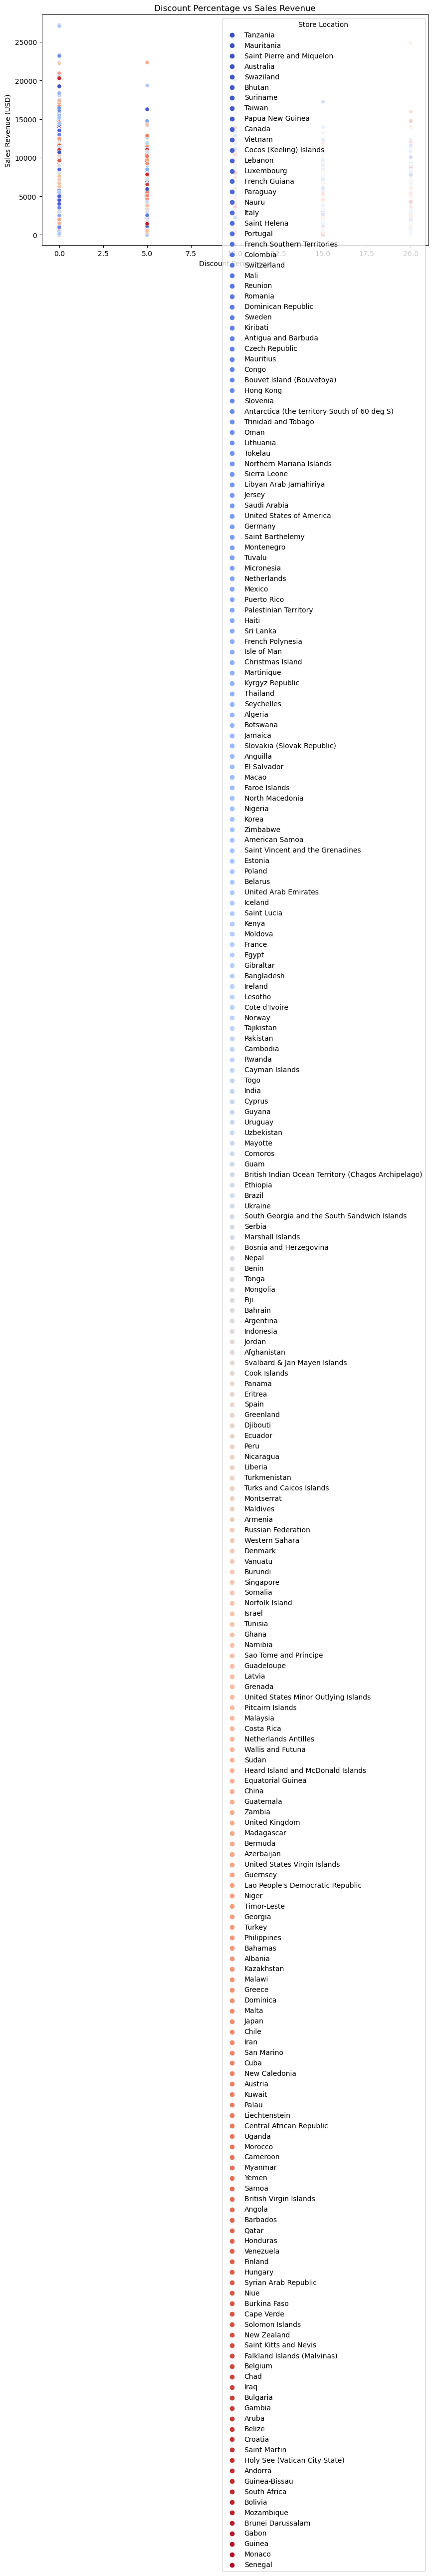

In [10]:
# Plot relationshi[ between Discount Percentage and Sales Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount Percentage', y ="Sales Revenue (USD)", hue='Store Location', palette='coolwarm')
plt.title('Discount Percentage vs Sales Revenue')
plt.xlabel('Discount Percentage')
plt.ylabel('Sales Revenue (USD)')
plt.show()

## Discount Percentage vs. Sales Revenue Across Store Locations: ##

The above plot offers an in-depth look at how discount strategies impact your sales across different store locations. Each dot on the plot represents a sale, with its position showing the discount offered and the revenue generated. What stands out is that sales with low or no discounts tend to generate a wide range of revenues — some very high, others more modest. However, as discount percentages increase, we see a concentration of sales with lower revenue, suggesting that higher discounts don’t necessarily lead to high revenue sales.

Additionally, the chart breaks down these insights across various store locations, showing how different regions apply discounts and how customers respond. For example, some stores might generate high revenue even with minimal discounts, while others rely more on offering discounts to boost sales. This visualization gives you actionable insights into which discount strategies work best in different locations, helping you refine your promotions and tailor them to specific markets.

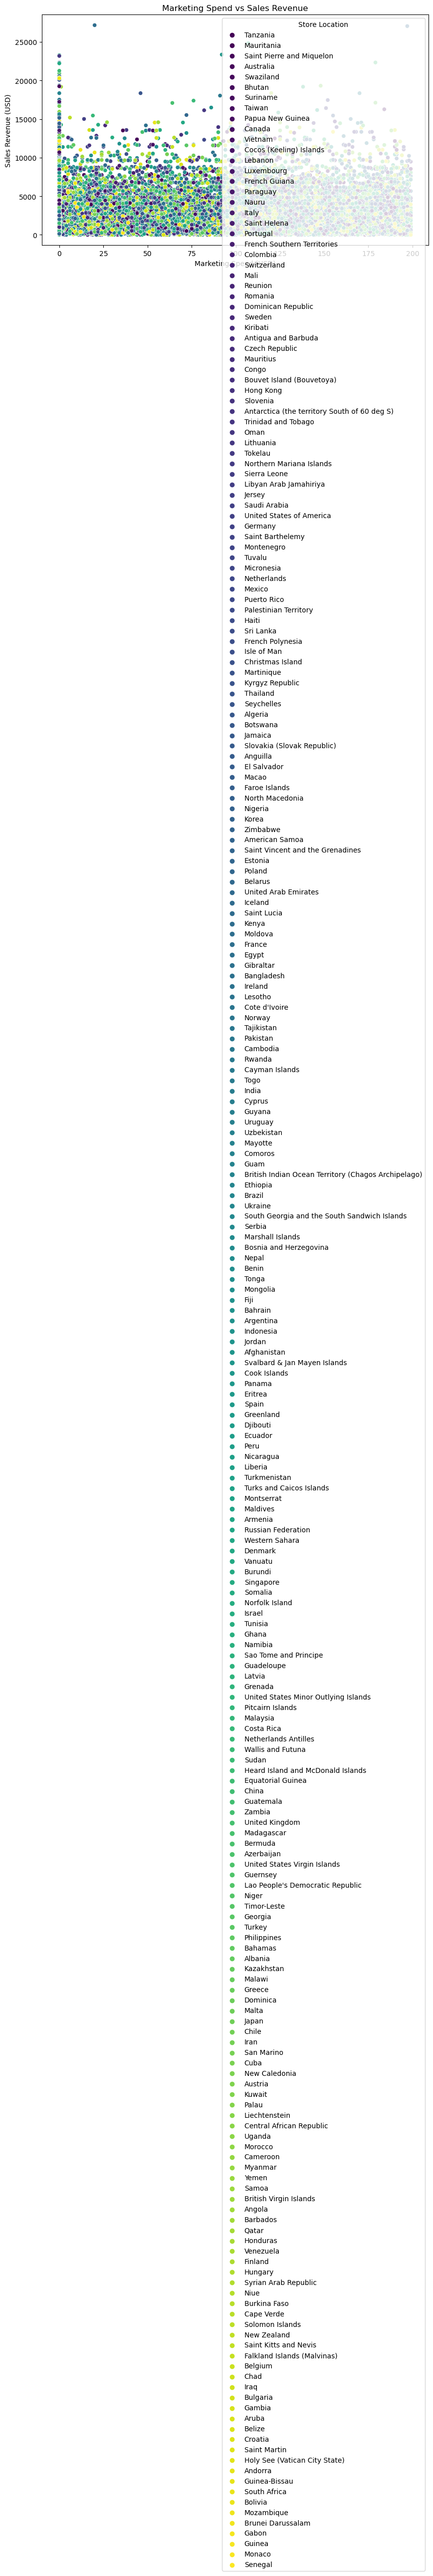

In [11]:
# Plot relationship between Marketing Spend and Sales Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Marketing Spend (USD)', y='Sales Revenue (USD)', hue='Store Location', palette='viridis')
plt.title('Marketing Spend vs Sales Revenue')
plt.xlabel('Marketing Spend (USD)')
plt.ylabel('Sales Revenue (USD)')
plt.show()


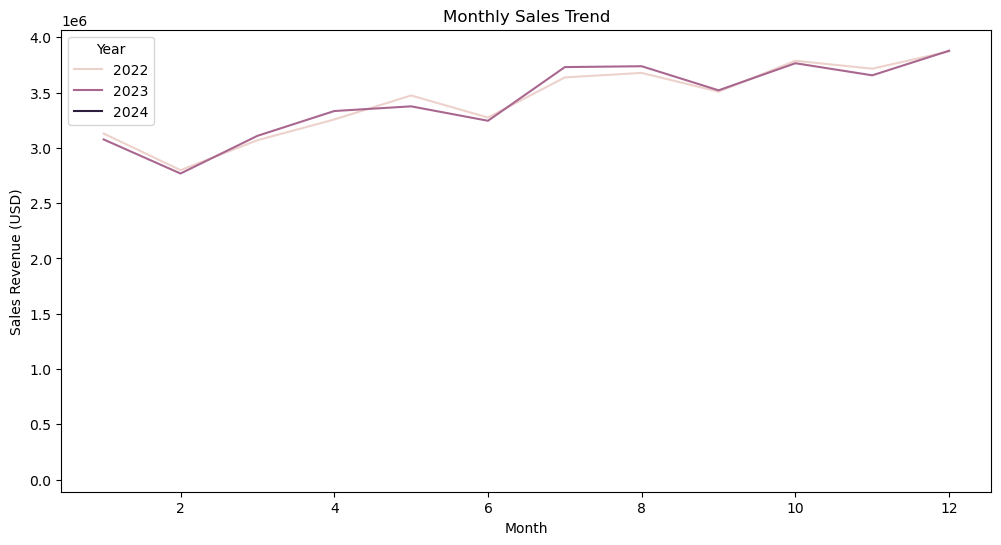

In [12]:
# Adding 'Month' and 'Year" columns to analyze trends
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and year to check overall trend
monthly_sales = df.groupby(['Year', 'Month'])['Sales Revenue (USD)'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales Revenue (USD)', hue='Year', markers='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Revenue (USD)')
plt.show()

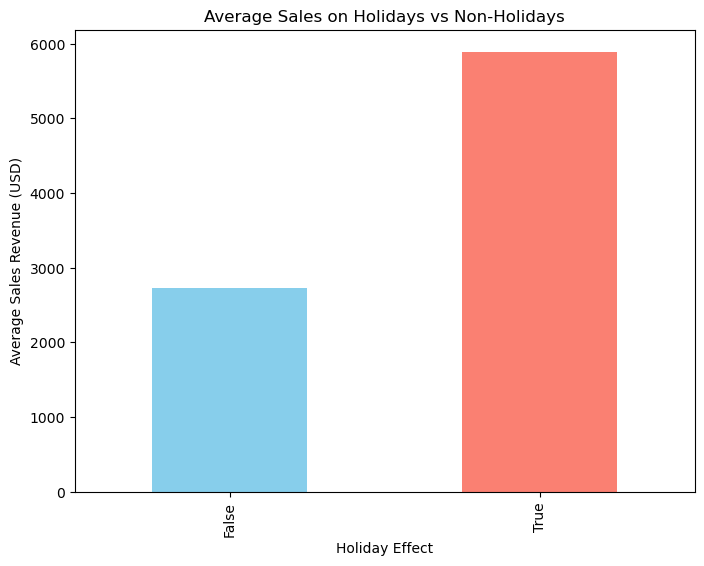

In [13]:
# Analysis on the impact od the holidays on sales
holiday_sales = df.groupby('Holiday Effect')['Sales Revenue (USD)'].mean()

# Plot holiday vs non-holiday sales
holiday_sales.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title('Average Sales on Holidays vs Non-Holidays')
plt.xlabel('Holiday Effect')
plt.ylabel('Average Sales Revenue (USD)')
plt.show()

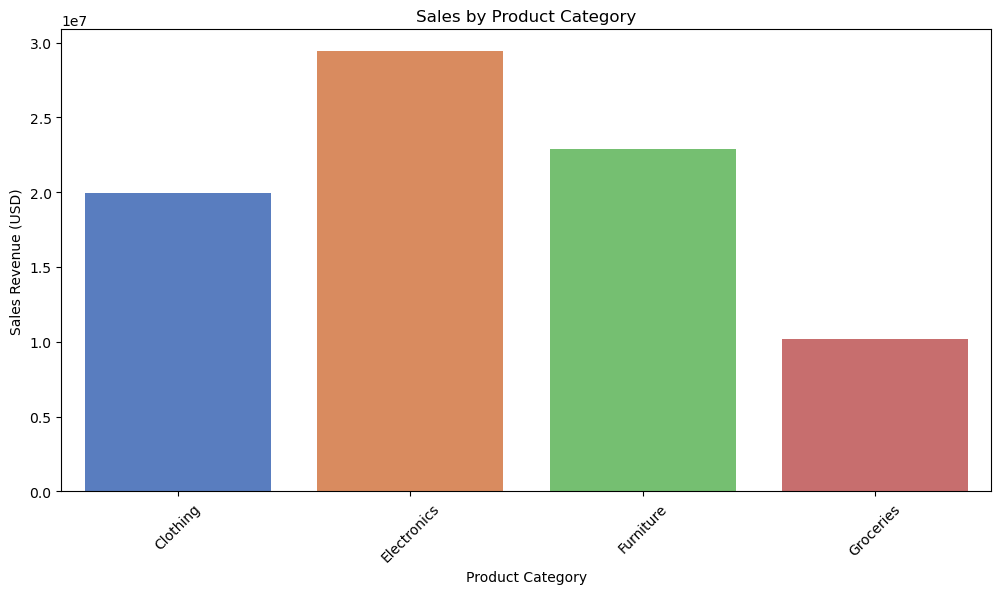

In [14]:
# Group sales by product category
category_sales = df.groupby('Product Category')['Sales Revenue (USD)'].sum().reset_index()

# Plot sales by product category
plt.figure(figsize=(12,6))
sns.barplot(data=category_sales, x='Product Category', y='Sales Revenue (USD)', palette='muted')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Revenue (USD)')
plt.xticks(rotation=45)
plt.show()